<a href="https://colab.research.google.com/github/Priyanka-Gangadhar-Palshetkar/MITx-Micromasters-Statistics-Data-Science/blob/main/Central_Limit_Theorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applications of Central Limit Theorem

## California housing data

[The data](https://github.com/yahe97/OneLeague/blob/main/housing.csv.zip) contains information from the 1990 California census. It pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The columns are as follows, their names are should be fairly self explanatory: 

1. `longitude`: A measure of how far west a house is; a higher value is farther west
2. `latitude`: A measure of how far north a house is; a higher value is farther north
3. `housingMedianAge`: Median age of a house within a block; a lower number is a newer building	
4. `totalRooms`: Total number of rooms within a block
5. `totalBedrooms`: Total number of bedrooms within a block
6. `population`: Total number of people residing within a block
7. `households`: Total number of households, a group of people residing within a home unit, for a block
8. `medianIncome`: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
9. `medianHouseValue`: Median house value for households within a block (measured in US Dollars)
10. `oceanProximity`: Location of the house w.r.t ocean/sea

Another description for the dataset is here: https://developers.google.com/machine-learning/crash-course/california-housing-data-description

In [27]:
# Imports

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from scipy.stats import norm, t, sem 
import seaborn as sns
%matplotlib inline

### Loading the data

Open the dataset. In Google Colab, you can find it in sample data in the files tab on the left. (Otherwise dowload it from the link https://github.com/yahe97/OneLeague/blob/main/housing.csv.zip, extract it and upload it back to the files tab in Google Colab.

In [2]:
data = pd.read_csv('sample_data/california_housing_train.csv')

We can take a look at the first five columns of the dataset using the head() function of the pandas dataframe.

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


We can take a look at the median house value by taking the corresponding column from the data frame:



In [4]:
median_house_value = data['median_house_value']
median_house_value

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

And we can also visualise it:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


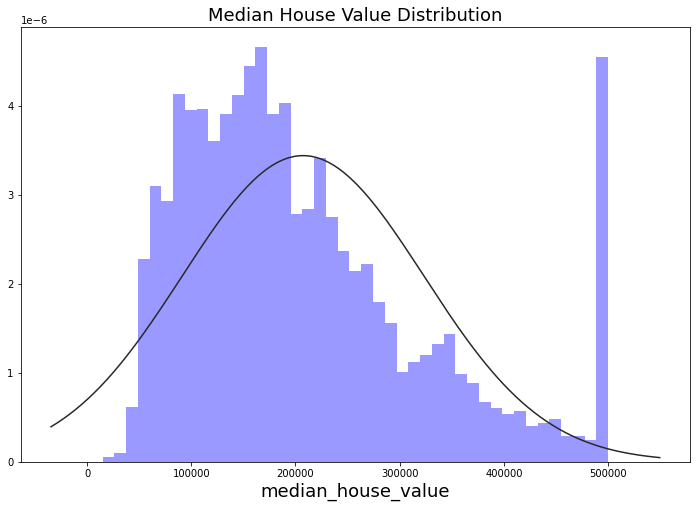

In [5]:
plt.figure(figsize=(12, 8))
plt.title('Median House Value Distribution', size=18)
plt.xlabel('Value in $', size=18)
sns.distplot(median_house_value, fit=norm, color='blue', kde=False)

### Remark/optional task

This dataset is a classic dataset for learning more about data science (as well as data cleaning and visualisation, statistics, machine learning,...). Feel free to do some more data exploration and see if you can notice any patterns! 

For example, take a look at the distribution above: can you notice any peculiar patterns? How would you deal with them?

There are also many notebooks available on the internet, such as [this](https://https://www.kaggle.com/code/crbelhekar619/california-housing-price-prediction-tutorial) or [this](https://rstudio-pubs-static.s3.amazonaws.com/617841_020b1c3834334c1c8c3e0ec67645775b.html). Fell free to reproduce some of the results below.

### Weak law of large numbers, Central limit theorem

Recall that the central limit states that when the independent and identically distributed (i.i.d.) variables $X_i$ are summed up and normalised, the distribution of that normalised sum tends towards the normal distribution.

$$\text{CDF of } \frac{X_1 + \dots + X_n - n\mathbb{E}[X]}{\sqrt{n}\sigma_X} → \text{ standard normal CDF}$$

We will now empirically try to see how the central limit theorem works using California housing dataset, taking the median house values as the random variables $X_i$.

### Task 1

Plot the *distribution of the sample sums* ($S_n$) of the median house values.

This requires the following steps:
* Sample $n$ values from the `median_house_value` variable which we derived earlier: those are the $X_i$s (from lectures you saw that $n=30$ could be enough)
* Compute the sample sum $S_n$
* Repeat this many (e.g. 1000) times to get many estimates of $S_n$
* Plot them all together using the visualisation routine similar to above.

Repeat the same with the *distribution of sample means* ($M_n$).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


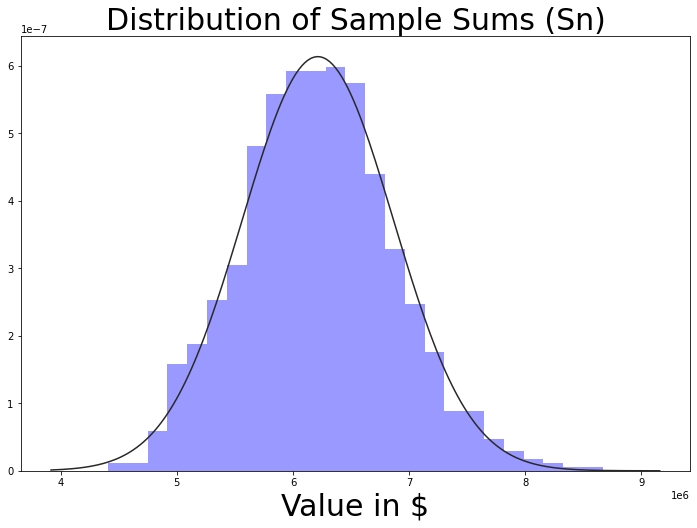

In [15]:
Sn_list = []
for _ in range(0,1000):
  df = median_house_value.sample(n=30)
  Sn = df.sum()
  Sn_list.append(Sn)

plt.figure(figsize=(12, 8))
plt.title('Distribution of Sample Sums (Sn)', size=30)
plt.xlabel('Value in $', size=30)
sns.distplot(Sn_list, fit=norm, color='blue', kde=False)

In [16]:
Sn_df = pd.DataFrame(Sn_list)
print("Mean: ", Sn_df.mean())
print("Variance: ", Sn_df.var())

Mean:  0    6213956.21
dtype: float64
Variance:  0    4.232918e+11
dtype: float64


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


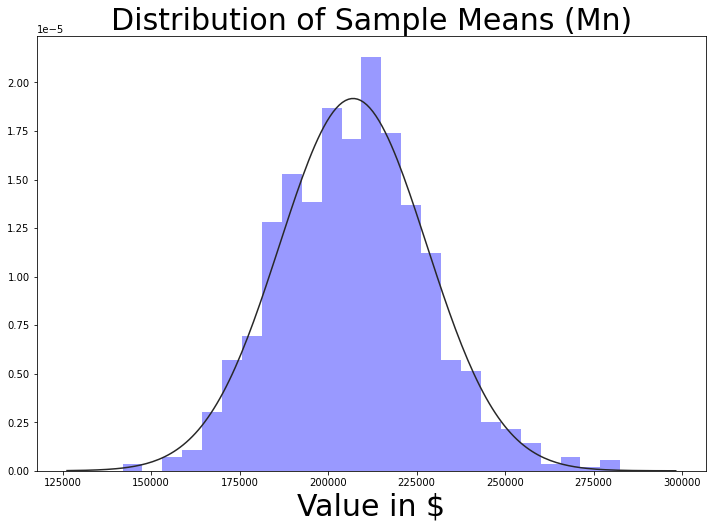

In [19]:
Mn_list = []
for _ in range(0,1000):
  df = median_house_value.sample(n=30)
  Mn = df.mean()
  Mn_list.append(Mn)

plt.figure(figsize=(12, 8))
plt.title('Distribution of Sample Means (Mn)', size=30)
plt.xlabel('Value in $', size=30)
sns.distplot(Mn_list, fit=norm, color='blue', kde=False)
  


In [20]:
Mn_df = pd.DataFrame(Mn_list)
print("Mean: ", Mn_df.mean())
print("Variance: ", Mn_df.var())

Mean:  0    207060.705867
dtype: float64
Variance:  0    4.334239e+08
dtype: float64


### Task 2: mathematical connections

You might notice the above distributions look Gaussian.

Can you use the material in lectures to find the parameters behind these distributions, their confidence intervals, or derive any other insights?

Things you could try:
* Use the formulas derived in lectures to obtain the parameter estimates (the various $\theta$s), and plot the normal distributions with those thetas. 
* Plot the distributions to see if they visually match those found empirically.
* Use the library functions to find means and variances of the $M_n$s and $S_n$s across the experiments, and compare them to the ones you found mathematically.
* Apply any other mathematical inequalities and verify that the same holds in this dataset.

In general, when you see a formula in lectures that you are curious about, think about how you could verify or see it play out in real data.

*Coding hint for plotting a normal distribution*. If you want to plot the PDF of a normal distribution $\mathcal{N}(a, b)$ with parameters a=5, b=11, you can do the following:

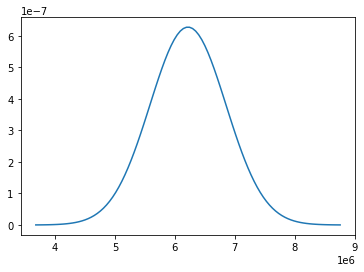

Programmatic Mean:  0    6213956.21
dtype: float64
Programmatic Variance:  0    4.232918e+11
dtype: float64
Mathematical Mean:  6219027.370588236
Mathematical Variance:  403567008042.82733
Confidence Interval - Mean (array([6173582.88613184]), array([6254329.53386816]))
Confidence Interval - Variance (array([4.23291756e+11]), array([4.23291837e+11]))


In [32]:
# For Sn
a = 30 * median_house_value.mean() #mean of CDF - n*mu
b = 30 * (median_house_value.var()) # variance of CDF - n*std^2
sigma = np.sqrt(b)
min_value, max_value = a - 4*sigma, a + 4*sigma # bounds for the coordinate axis in the plot
x = np.linspace(min_value, max_value, 100)
plt.plot(x, norm.pdf(x, a, sigma))
plt.show()

print("Programmatic Mean: ", Sn_df.mean())
print("Programmatic Variance: ", Sn_df.var())

print("Mathematical Mean: ", a)
print("Mathematical Variance: ", b)

print("Confidence Interval - Mean", t.interval(alpha=0.95, df=len(Sn_df)-1, loc=Sn_df.mean(), scale=sem(Sn_df)) )
print("Confidence Interval - Variance", t.interval(alpha=0.95, df=len(Sn_df)-1, loc=Sn_df.var(), scale=sem(Sn_df)) )



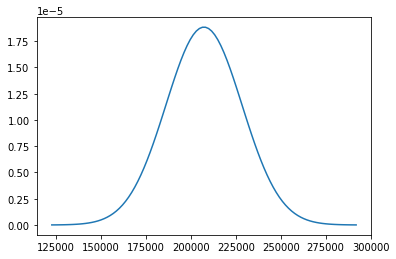

Programmatic Mean:  0    207060.705867
dtype: float64
Programmatic Variance:  0    4.334239e+08
dtype: float64
Mathematical Mean:  207300.91235294117
Mathematical Variance:  448407786.7142526
Confidence Interval - Mean (array([205768.79964163]), array([208352.61209171]))
Confidence Interval - Variance (array([4.33422574e+08]), array([4.33425158e+08]))


In [49]:
# For Mn
a = median_house_value.mean() # mu
b = (median_house_value.var())/30 # var / n
sigma = np.sqrt(b)
min_value, max_value = a - 4*sigma, a + 4*sigma # bounds for the coordinate axis in the plot
x = np.linspace(min_value, max_value, 100)
plt.plot(x, norm.pdf(x, a, sigma))
plt.show()


print("Programmatic Mean: ", Mn_df.mean())
print("Programmatic Variance: ", Mn_df.var())

print("Mathematical Mean: ", a)
print("Mathematical Variance: ", b)

print("Confidence Interval - Mean", t.interval(alpha=0.95, df=len(Mn_df)-1, loc=Mn_df.mean(), scale=sem(Mn_df)) )
print("Confidence Interval - Variance", t.interval(alpha=0.95, df=len(Mn_df)-1, loc=Mn_df.var(), scale=sem(Mn_df)) )


In [34]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Task 3: weather forecast data

Replicate the same task using the following dataset with the weather information for all the major cities in all of the 29 states of India: https://github.com/yahe97/OneLeague/blob/main/forecast_data.csv.zip

You will need to upload this dataset to Google Colaboratory by yourself.

The following are the variables contained in the dataset:

|        Field       | Data Type |                           Description                           |
|:------------------:|:---------:|:---------------------------------------------------------------:|
| last_updated       | string    | Local time when the real time data was updated.                 |
| last_updated_epoch | int       | Local time when the real time data was updated in unix time.    |
| temp_c             | decimal   | Temperature in celsius                                          |
| temp_f             | decimal   | Temperature in fahrenheit                                       |
| feelslike_c        | decimal   | Feels like temperature in celsius                               |
| feelslike_f        | decimal   | Feels like temperature in fahrenheit                            |
| condition:text     | string    | Weather condition text                                          |
| condition:icon     | string    | Weather icon url                                                |
| condition:code     | int       | Weather condition unique code.                                  |
| wind_mph           | decimal   | Wind speed in miles per hour                                    |
| wind_kph           | decimal   | Wind speed in kilometer per hour                                |
| wind_degree        | int       | Wind direction in degrees                                       |
| wind_dir           | string    | Wind direction as 16 point compass. e.g.: NSW                   |
| pressure_mb        | decimal   | Pressure in millibars                                           |
| pressure_in        | decimal   | Pressure in inches                                              |
| precip_mm          | decimal   | Precipitation amount in millimeters                             |
| precip_in          | decimal   | Precipitation amount in inches                                  |
| humidity           | int       | Humidity as percentage                                          |
| cloud              | int       | Cloud cover as percentage                                       |
| is_day             | int       | 1 = Yes 0 = No Whether to show day condition icon or night icon |
| uv                 | decimal   | UV Index                                                        |
| gust_mph           | decimal   | Wind gust in miles per hour                                     |
| gust_kph           | decimal   | Wind gust in kilometer per hour                                 |


Pick a variable you think to be most suitable to explore and illustrate the central limit theorem with.


In [36]:
data = pd.read_csv('forecast_data.csv')

In [ ]:
data.head()

In [38]:
temp_celsius = data['temp_c']
temp_celsius

0        23.2
1        23.0
2        22.7
3        22.5
4        22.3
         ... 
29563    25.7
29564    24.8
29565    23.9
29566    23.3
29567    22.8
Name: temp_c, Length: 29568, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


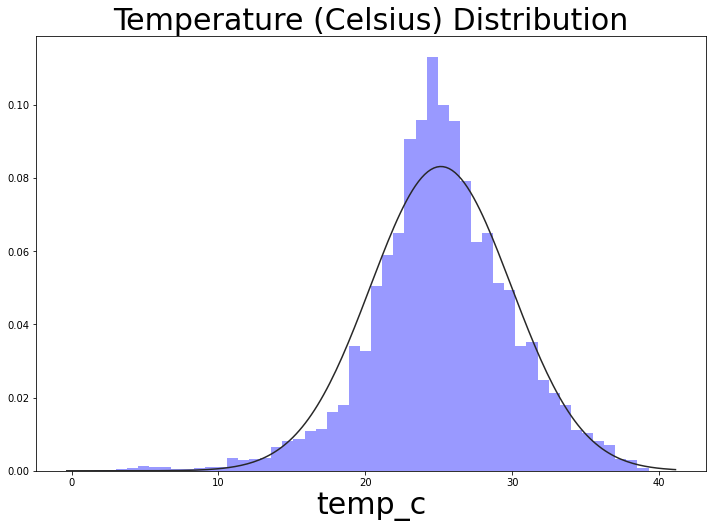

In [39]:
plt.figure(figsize=(12, 8))
plt.title('Temperature (Celsius) Distribution', size=30)
plt.xlabel('Value in degree celsius', size=30)
sns.distplot(temp_celsius, fit=norm, color='blue', kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


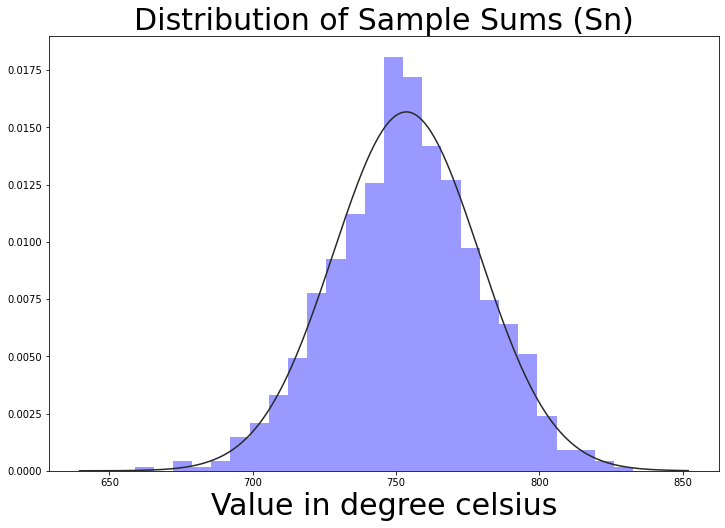

In [45]:
Sn_temp_list = []
for _ in range(0,1000):
  df = temp_celsius.sample(n=30)
  Sn = df.sum()
  Sn_temp_list.append(Sn)

Sn_temp_df = pd.DataFrame(Sn_temp_list)
plt.figure(figsize=(12, 8))
plt.title('Distribution of Sample Sums (Sn)', size=30)
plt.xlabel('Value in degree celsius', size=30)
sns.distplot(Sn_temp_list, fit=norm, color='blue', kde=False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


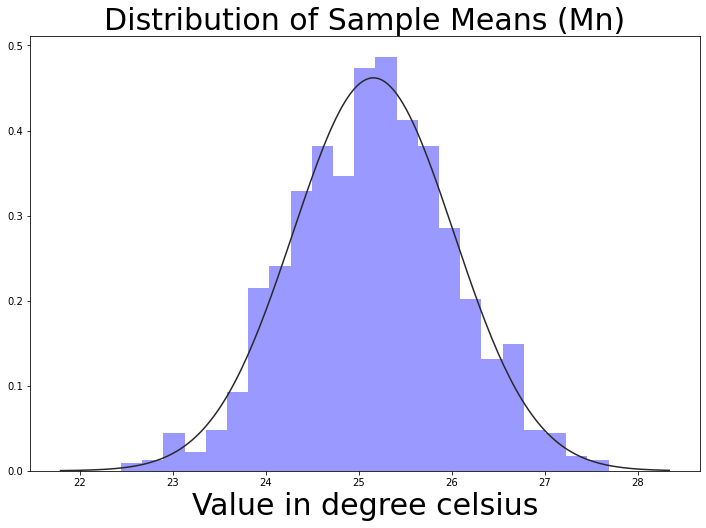

In [47]:
Mn_temp_list = []
for _ in range(0,1000):
  df = temp_celsius.sample(n=30)
  Mn = df.mean()
  Mn_temp_list.append(Mn)

Mn_temp_df = pd.DataFrame(Mn_temp_list)
plt.figure(figsize=(12, 8))
plt.title('Distribution of Sample Means (Mn)', size=30)
plt.xlabel('Value in degree celsius', size=30)
sns.distplot(Mn_temp_list, fit=norm, color='blue', kde=False)

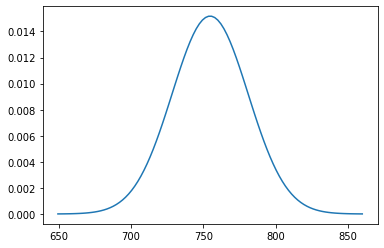

Programmatic Mean:  0    753.5776
dtype: float64
Programmatic Variance:  0    648.126745
dtype: float64
Mathematical Mean:  754.5691964285713
Mathematical Variance:  690.5383935063948
Confidence Interval - Mean (array([751.99779112]), array([755.15740888]))
Confidence Interval - Variance (array([646.5469361]), array([649.70655387]))


In [48]:
# For Sn
a = 30 * temp_celsius.mean()
b = 30 * (temp_celsius.var())
sigma = np.sqrt(b)
min_value, max_value = a - 4*sigma, a + 4*sigma # bounds for the coordinate axis in the plot
x = np.linspace(min_value, max_value, 100)
plt.plot(x, norm.pdf(x, a, sigma))
plt.show()

print("Programmatic Mean: ", Sn_temp_df.mean())
print("Programmatic Variance: ", Sn_temp_df.var())

print("Mathematical Mean: ", a)
print("Mathematical Variance: ", b)

print("Confidence Interval - Mean", t.interval(alpha=0.95, df=len(Sn_temp_df)-1, loc=Sn_temp_df.mean(), scale=sem(Sn_temp_df)) )
print("Confidence Interval - Variance", t.interval(alpha=0.95, df=len(Sn_temp_df)-1, loc=Sn_temp_df.var(), scale=sem(Sn_temp_df)) )



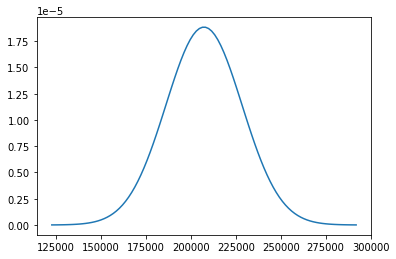

Programmatic Mean:  0    25.156777
dtype: float64
Programmatic Variance:  0    0.746491
dtype: float64
Mathematical Mean:  207300.91235294117
Mathematical Variance:  448407786.7142526
Confidence Interval - Mean (array([25.10316158]), array([25.21039175]))
Confidence Interval - Variance (array([0.69287634]), array([0.80010651]))


In [50]:
# For Mn
a = median_house_value.mean() # mu
b = (median_house_value.var())/30 # var / n
sigma = np.sqrt(b)
min_value, max_value = a - 4*sigma, a + 4*sigma # bounds for the coordinate axis in the plot
x = np.linspace(min_value, max_value, 100)
plt.plot(x, norm.pdf(x, a, sigma))
plt.show()

print("Programmatic Mean: ", Mn_temp_df.mean())
print("Programmatic Variance: ", Mn_temp_df.var())

print("Mathematical Mean: ", a)
print("Mathematical Variance: ", b)

print("Confidence Interval - Mean", t.interval(alpha=0.95, df=len(Mn_temp_df)-1, loc=Mn_temp_df.mean(), scale=sem(Mn_temp_df)) )
print("Confidence Interval - Variance", t.interval(alpha=0.95, df=len(Mn_temp_df)-1, loc=Mn_temp_df.var(), scale=sem(Mn_temp_df)) )

